In [1]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [2]:
datasetFolderPath = r"./Dataset/"
trainsetName = r"penguin_train.csv"
testsetName = r"penguin_test.csv"

In [3]:
traindata = pd.read_csv(datasetFolderPath+trainsetName)
traindata.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
traindata.isnull().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [5]:
traindata.dropna(inplace=True)
traindata.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<AxesSubplot: xlabel='species', ylabel='island'>

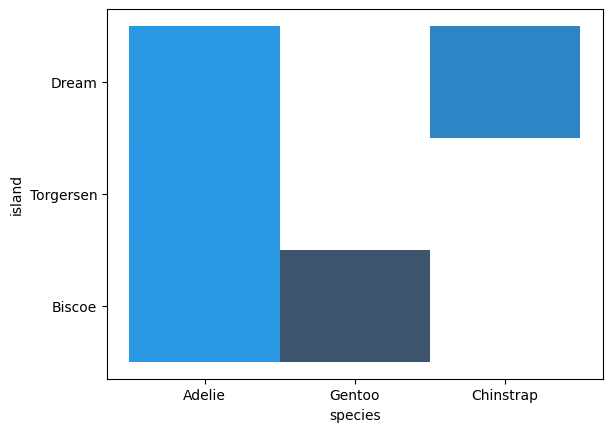

In [6]:
sns.histplot(x="species",y="island",data=traindata)

<AxesSubplot: xlabel='species', ylabel='culmen_length_mm'>

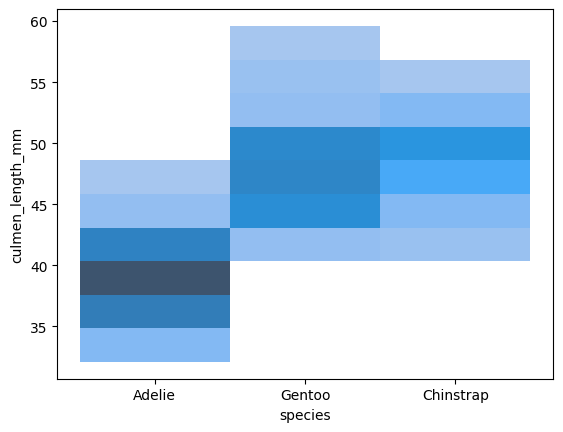

In [7]:
sns.histplot(x="species",y="culmen_length_mm",data=traindata)

<AxesSubplot: xlabel='species', ylabel='culmen_depth_mm'>

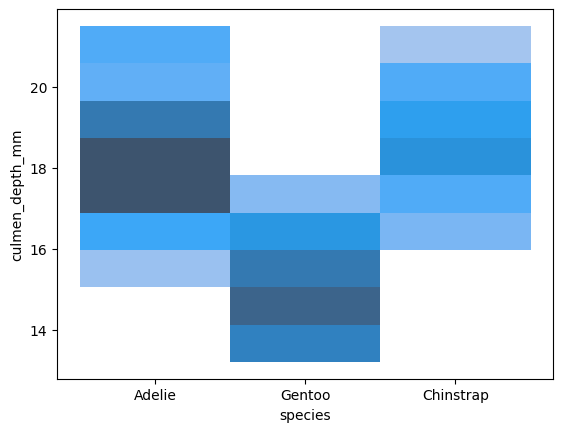

In [8]:
sns.histplot(x="species",y="culmen_depth_mm",data=traindata)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

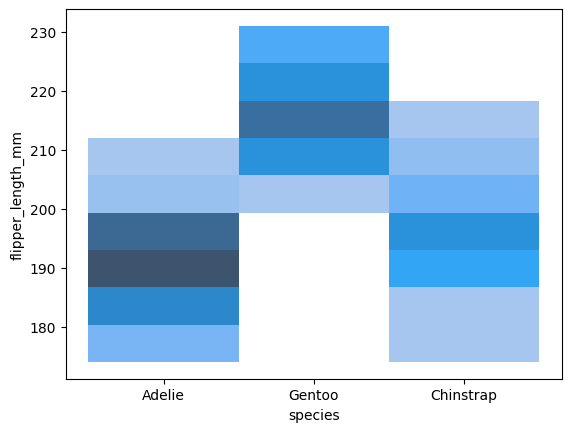

In [9]:
sns.histplot(x="species",y="flipper_length_mm",data=traindata)


<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

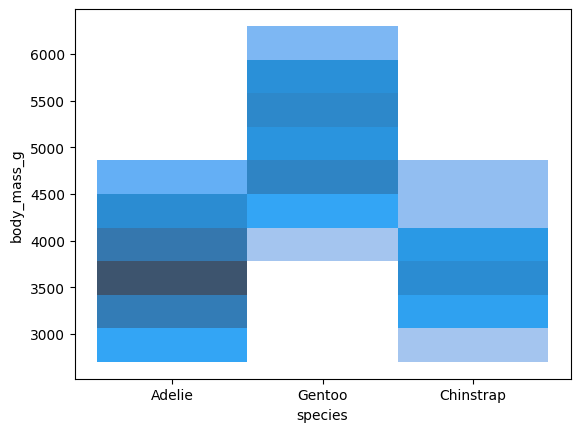

In [10]:
sns.histplot(x="species",y="body_mass_g",data=traindata)

<AxesSubplot: xlabel='species', ylabel='sex'>

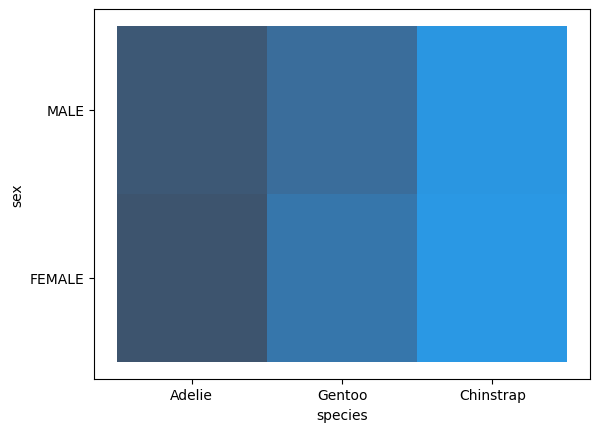

In [11]:
sns.histplot(x="species",y="sex",data=traindata)

In [12]:
traindata.drop("sex",inplace=True,axis=1)

In [13]:
_,traindata["species"] = np.unique(traindata["species"],return_inverse=True)
_,traindata["island"] = np.unique(traindata["island"],return_inverse=True)

trainlabel = np.ravel(traindata["species"])
traindata.drop(["species"],inplace=True,axis=1)
trainlabel.shape
trainlabel = torch.from_numpy(trainlabel)


In [14]:
trainlabel_one = torch.zeros(231,3)
trainlabel_one.scatter_(1,trainlabel.unsqueeze(1),1)
trainlabel_one.shape

torch.Size([231, 3])

In [15]:
traindata.head(5)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,1,40.6,17.2,187.0,3475.0
1,2,38.9,17.8,181.0,3625.0
2,0,35.7,16.9,185.0,3150.0
3,0,50.0,15.3,220.0,5550.0
4,0,34.5,18.1,187.0,2900.0


In [16]:
traindata = torch.from_numpy(traindata.to_numpy(dtype=np.float32))
traindata.shape

torch.Size([231, 5])

In [26]:
model = nn.Sequential(nn.Linear(5,3))

optimizer = torch.optim.SGD(model.parameters(),lr=1e-5)

In [28]:
epochs = 10
lossfn = nn.CrossEntropyLoss()
for epoch in range(epochs) :
    predict = model(traindata)
    cost = lossfn(predict,trainlabel_one)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print(f'epoch{epoch:>4d} cost:{cost.item():>.6f}')

epoch   0 cost:34.452614
epoch   1 cost:40.835720
epoch   2 cost:90.673820
epoch   3 cost:19.869987
epoch   4 cost:66.549049
epoch   5 cost:13.479267
epoch   6 cost:31.532681
epoch   7 cost:40.333553
epoch   8 cost:69.264343
epoch   9 cost:27.632465


In [29]:

testdata = pd.read_csv(datasetFolderPath+testsetName)
testdata.dropna(inplace=True)
testdata.drop("sex",inplace=True,axis=1)

_,testdata["species"] = np.unique(testdata["species"],return_inverse=True)
_, testdata["island"] = np.unique(testdata["island"],return_inverse=True)

testlabel = np.ravel(testdata["species"])
testdata.drop(["species"],inplace=True,axis=1)
testdata = torch.from_numpy(testdata.to_numpy(dtype=np.float32))
testlabel = torch.from_numpy(testlabel)
testlabel.shape


torch.Size([102])

In [30]:
testlabel_one = torch.zeros(102,3)
testlabel_one.scatter(1,testlabel.unsqueeze(1),1)

model.eval()
test_loss, correct = 0,0

with torch.no_grad() : 
    pred = model(testdata)
    test_loss = lossfn(pred,testlabel_one).item()
    correct = (pred == testlabel_one).type(torch.float).sum().item()


pred[:]
trainlabel_one[:]
pred[:]

tensor([[411.2924, 386.0648, 297.3983],
        [462.7070, 432.6209, 346.5320],
        [557.9554, 525.5996, 433.8633],
        [380.8719, 358.5085, 275.7389],
        [453.9271, 425.2879, 337.6259],
        [559.0922, 526.3422, 433.9528],
        [360.7044, 337.7872, 253.5967],
        [411.8263, 384.6061, 301.8136],
        [409.1458, 386.5813, 303.6206],
        [544.7589, 513.5732, 421.1667],
        [384.8496, 358.5544, 277.6395],
        [450.6825, 425.2455, 340.1118],
        [407.4657, 385.2866, 298.1055],
        [364.6932, 342.2134, 260.0425],
        [390.6274, 367.9458, 288.5140],
        [502.9875, 472.4733, 381.4956],
        [392.7385, 365.4859, 284.0992],
        [558.6337, 525.7366, 434.2754],
        [320.7152, 300.4727, 219.4512],
        [371.0527, 344.3524, 261.3401],
        [505.4263, 475.9628, 385.2044],
        [357.4268, 335.5395, 251.1660],
        [504.0615, 473.3729, 383.6856],
        [448.9271, 423.3277, 330.4449],
        [477.8756, 447.4398, 360.3910],


In [23]:
predict.argmin(1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])